## Лабораторная работа EDA-1

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1

Прочитайте средствами pandas файл с данными. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
df = pd.read_csv('german_credit.csv')

# Вывод первых и последних 5 строк, а также размера таблицы
print("Первые 5 строк:")
print(df.head())

print("\nПоследние 5 строк:")
print(df.tail())

print("\nРазмер таблицы:")
print(df.shape)

Первые 5 строк:
                status  duration                               credit_history  \
0  no checking account        18      all credits at this bank paid back duly   
1  no checking account         9      all credits at this bank paid back duly   
2           ... < 0 DM        12  no credits taken/all credits paid back duly   
3  no checking account        12      all credits at this bank paid back duly   
4  no checking account        12      all credits at this bank paid back duly   

      purpose  amount                     savings employment_duration  \
0  car (used)    1049  unknown/no savings account              < 1 yr   
1      others    2799  unknown/no savings account    1 <= ... < 4 yrs   
2  retraining     841               ... <  100 DM    4 <= ... < 7 yrs   
3      others    2122  unknown/no savings account    1 <= ... < 4 yrs   
4      others    2171  unknown/no savings account    1 <= ... < 4 yrs   

  installment_rate                   personal_status_sex o

### Задание 2 

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
# Проверка пропусков в данных (пропущенные значения)
missing_values = df.isnull().sum()  # Метод isnull() создает булев DataFrame, где True - это пропущенные значения.
                                      # Метод sum() подсчитывает количество пропущенных значений по каждому столбцу.

# Определение списка количественных признаков (числовых)
quantitative_features = ['duration', 'amount', 'age']  # Список признаков, которые представляют собой количественные данные (числовые переменные).

# Определение списка бинарных признаков (с двумя возможными значениями)
binary_features = ['foreign_worker', 'telephone']  # Список бинарных признаков, которые принимают только два значения, например, 0 или 1.

# Определение списка порядковых признаков (с упорядоченными категориями)
ordinal_features = ['employment_duration', 'installment_rate', 'number_credits', 'people_liable']  # Список признаков, которые имеют порядковые категории (например, рейтинг, годы).

# Создание списка категориальных признаков (которые не являются количественными, бинарными или порядковыми)
categorical_features = [col for col in df.columns if col not in quantitative_features + binary_features + ordinal_features + ['credit_risk']]  
# Здесь мы создаем список всех признаков, которые не попали в предыдущие категории. Таким образом, все оставшиеся признаки 
# в DataFrame считаются категориальными (нечисловыми признаками).
# Примечание: также исключаем столбец 'credit_risk', так как это целевая переменная.

# Выводим информацию о пропущенных значениях (если они есть)
print("Проверка пропусков в данных:")  
print(missing_values[missing_values > 0])  # Выводим только те признаки, где есть пропущенные значения (т.е. их количество > 0)

# Выводим список количественных признаков
print("\nКоличественные признаки:")  
print(quantitative_features)  # Печатаем список количественных признаков, определенных выше.

# Выводим список бинарных признаков
print("\nБинарные признаки:")  
print(binary_features)  # Печатаем список бинарных признаков.

# Выводим список порядковых признаков
print("\nПорядковые признаки:")  
print(ordinal_features)  # Печатаем список порядковых признаков.

# Выводим список категориальных признаков
print("\nКатегориальные признаки:")  
print(categorical_features)  # Печатаем список категориальных признаков, которые были автоматически сформированы.


Проверка пропусков в данных:
Series([], dtype: int64)

Количественные признаки:
['duration', 'amount', 'age']

Бинарные признаки:
['foreign_worker', 'telephone']

Порядковые признаки:
['employment_duration', 'installment_rate', 'number_credits', 'people_liable']

Категориальные признаки:
['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'job']


### Задание 3 

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
# Группируем данные по признаку 'purpose' (цель кредита) и вычисляем среднее значение по столбцу 'amount' (сумма кредита) для каждой группы.
average_amount_per_purpose = df.groupby('purpose')['amount'].mean()  # Метод groupby() группирует данные по уникальным значениям в столбце 'purpose'.
                                                               # После этого мы вычисляем среднее значение суммы кредита (столбец 'amount') для каждой группы.

# Печатаем среднюю сумму кредита по каждой категории 'purpose'
print("Средняя сумма кредита в каждой категории (purpose):")  # Сообщение для вывода в консоль.
print(average_amount_per_purpose)  # Выводим результат, который содержит средние суммы кредита для каждой категории цели кредита.


Средняя сумма кредита в каждой категории (purpose):
purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
# Фильтрация клиентов моложе 30 лет, которые снимают жилье
under_30_rent = df[(df['age'] < 30) & (df['housing'] == 'rent')].shape[0]  
# Описание: Фильтруем DataFrame, выбирая только тех клиентов, у которых возраст меньше 30 лет и статус жилья — аренда ('housing' == 'rent').
# .shape[0] возвращает количество строк (клиентов), которые удовлетворяют этим условиям.

# Общее количество клиентов моложе 30 лет
total_under_30 = df[df['age'] < 30].shape[0]  
# Описание: Фильтруем DataFrame для всех клиентов, возраст которых меньше 30 лет, и считаем их общее количество.

# Процент клиентов моложе 30 лет, снимающих жилье
percent_under_30_rent = (under_30_rent / total_under_30) * 100 if total_under_30 > 0 else 0
# Описание: Вычисляем процент клиентов, моложе 30 лет, которые арендуют жилье. 
# Если total_under_30 > 0, то процент рассчитывается как (количество клиентов, снимающих жилье / общее количество клиентов) * 100.
# Если total_under_30 = 0, то возвращаем 0, чтобы избежать деления на ноль.

# Фильтрация клиентов старше 40 лет, которые снимают жилье
over_40_rent = df[(df['age'] > 40) & (df['housing'] == 'rent')].shape[0]  
# Описание: Фильтруем DataFrame, выбирая только тех клиентов, возраст которых больше 40 лет и статус жилья — аренда ('housing' == 'rent').
# .shape[0] возвращает количество строк (клиентов), которые удовлетворяют этим условиям.

# Общее количество клиентов старше 40 лет
total_over_40 = df[df['age'] > 40].shape[0]  
# Описание: Фильтруем DataFrame для всех клиентов, возраст которых больше 40 лет, и считаем их общее количество.

# Процент клиентов старше 40 лет, снимающих жилье
percent_over_40_rent = (over_40_rent / total_over_40) * 100 if total_over_40 > 0 else 0  
# Описание: Вычисляем процент клиентов, старше 40 лет, которые арендуют жилье. 
# Если total_over_40 > 0, то процент рассчитывается как (количество клиентов, снимающих жилье / общее количество клиентов) * 100.
# Если total_over_40 = 0, то возвращаем 0, чтобы избежать деления на ноль.

# Выводим результаты
print(f"Процент клиентов моложе 30 лет, снимающих жилье: {percent_under_30_rent:.2f}%")
# Описание: Печатаем процент клиентов моложе 30 лет, снимающих жилье. .2f указывает на вывод с двумя знаками после запятой.

print(f"Процент клиентов старше 40 лет, снимающих жилье: {percent_over_40_rent:.2f}%")
# Описание: Печатаем процент клиентов старше 40 лет, снимающих жилье. .2f указывает на вывод с двумя знаками после запятой.


Процент клиентов моложе 30 лет, снимающих жилье: 66.67%
Процент клиентов старше 40 лет, снимающих жилье: 68.01%


### Задание 5 

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
# Фильтрация для подсчета количества иностранных работников с более чем 3 кредитами
foreigners_more_than_3_credits = df[(df['foreign_worker'] == 'yes') & (df['number_credits'] > 3)].shape[0]
# Описание:
# - df['foreign_worker'] == 'yes' фильтрует по иностранным работникам (если столбец 'foreign_worker' содержит значение 'yes').
# - df['number_credits'] > 3 фильтрует по количеству кредитов больше 3 (убрали кавычки вокруг числа 3, так как 'number_credits' скорее всего числовой столбец).
# - .shape[0] возвращает количество строк (клиентов), удовлетворяющих этим условиям.

# Выводим результат
print(f"Количество иностранцев с количеством кредитов больше 3: {foreigners_more_than_3_credits}")
# Описание: Печатаем количество клиентов, которые являются иностранными работниками и имеют больше 3 кредитов.


Количество иностранцев с количеством кредитов больше 3: 1


### Задание 6 

In [ ]:
# Импортируем библиотеку numpy для работы с числовыми данными и математическими функциями
import numpy as np

# Импортируем библиотеку matplotlib.pyplot для создания графиков
import matplotlib.pyplot as plt

# Команда для отображения графиков непосредственно в Jupyter Notebook
%matplotlib inline


Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

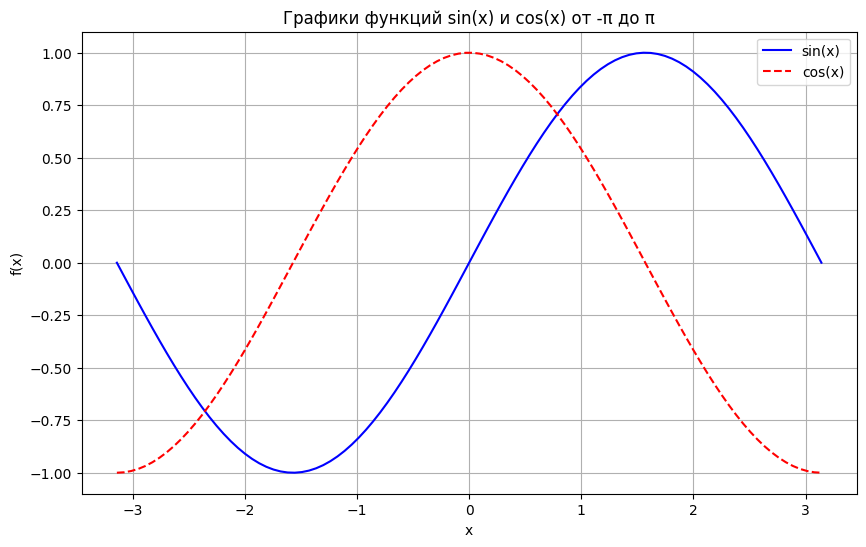

In [ ]:
# Импортируем необходимые библиотеки
import numpy as np  # Для работы с числовыми операциями и массивами
import matplotlib.pyplot as plt  # Для визуализации данных через графики

# Создаем массив значений x от -π до π
x = np.linspace(-np.pi, np.pi, 100)

# Рассчитываем значения синуса и косинуса для каждого значения x
y_sin = np.sin(x)  # Синус от x
y_cos = np.cos(x)  # Косинус от x

# Создаем фигуру для графика с размером 10x6
plt.figure(figsize=(10, 6))

# Строим график функции синуса с подписью 'sin(x)' и синим цветом
plt.plot(x, y_sin, label='sin(x)', color='blue')

# Строим график функции косинуса с подписью 'cos(x)', красным цветом и пунктирной линией
plt.plot(x, y_cos, label='cos(x)', color='red', linestyle='--')

# Добавляем легенду для графиков
plt.legend()

# Добавляем сетку для лучшей видимости значений на графике
plt.grid(True)

# Подписываем оси x и y
plt.xlabel('x')
plt.ylabel('f(x)')

# Добавляем заголовок графика
plt.title('Графики функций sin(x) и cos(x) от -π до π')

# Показываем график
plt.show()


### Задание 7 

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

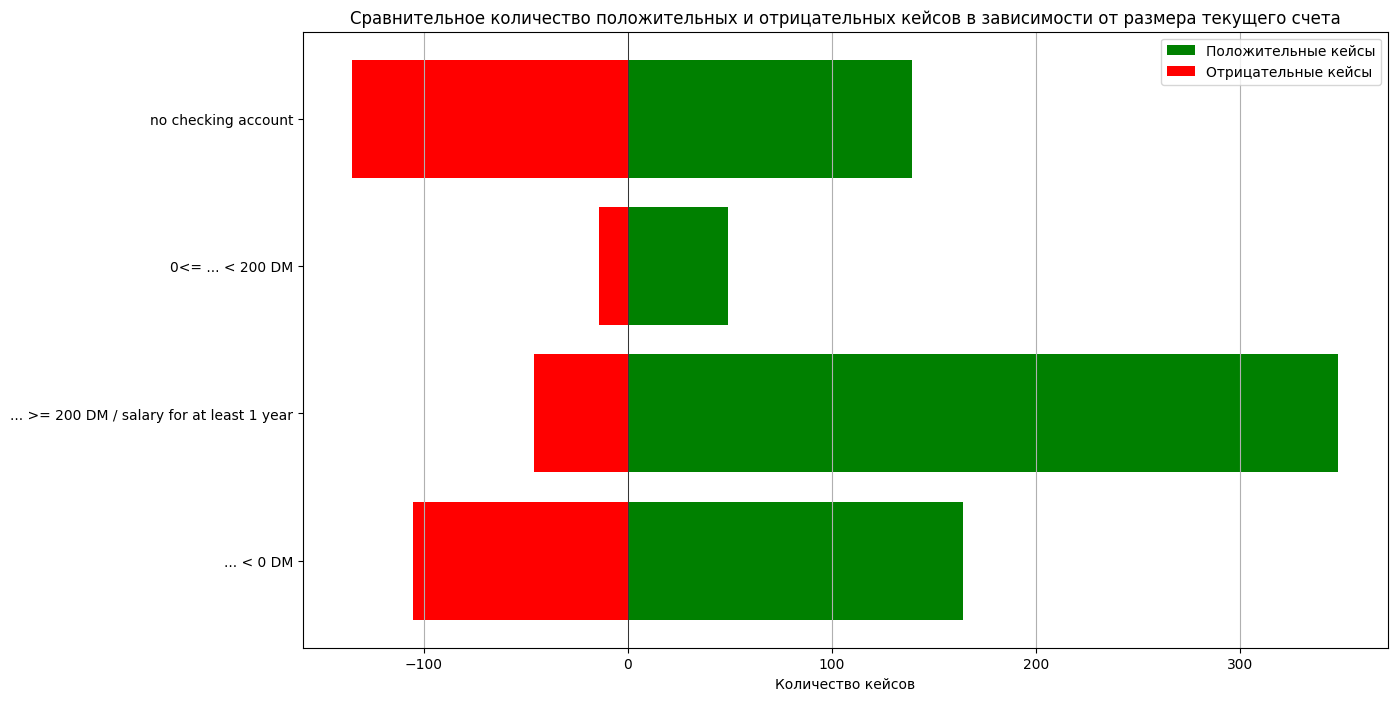

In [ ]:
# Выбираем данные для положительных и отрицательных кейсов
# Для положительных кейсов выбираются строки, где значение в столбце 'credit_risk' равно 'good',
# затем считаются уникальные значения в столбце 'status' (статус текущего счета).
positive_cases = df[df['credit_risk'] == 'good']['status'].value_counts()

# Аналогично для отрицательных кейсов (где 'credit_risk' равно 'bad')
negative_cases = df[df['credit_risk'] == 'bad']['status'].value_counts()

# Создаем объединенный список всех уникальных значений в 'status' для положительных и отрицательных кейсов
# Используем sorted(set()) для того, чтобы гарантировать одинаковый порядок категорий на оси Y
statuses = sorted(set(positive_cases.index).union(negative_cases.index))

# Создание фигуры для графика
plt.figure(figsize=(14, 8))  # Устанавливаем размер графика (14x8 дюймов)

# Строим горизонтальную столбчатую диаграмму для положительных кейсов
# Метод 'reindex' гарантирует, что все статусы будут отображены, даже если они отсутствуют в данных
# 'fillna(0)' заполняет пропуски нулями, если какой-то статус отсутствует в данных для 'good' кейсов
plt.barh(statuses, positive_cases.reindex(statuses).fillna(0), color='green', label='Положительные кейсы')

# Строим аналогичную диаграмму для отрицательных кейсов
# Для визуального разделения положительных и отрицательных столбцов добавляем знак минус перед значениями
plt.barh(statuses, -negative_cases.reindex(statuses).fillna(0), color='red', label='Отрицательные кейсы')

# Подписываем оси и добавляем другие элементы графика
plt.xlabel('Количество кейсов')  # Подписываем ось X (Количество кейсов)
plt.title('Сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счета')  # Заголовок
plt.axvline(0, color='black', linewidth=0.5)  # Добавляем вертикальную линию на уровне 0 для разделения положительных и отрицательных значений
plt.legend()  # Добавляем легенду для различия положительных и отрицательных кейсов
plt.grid(True, axis='x')  # Включаем сетку только по оси X для лучшего восприятия

# Отображаем график
plt.show()  # Показываем график на экране


### Задание 8 

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

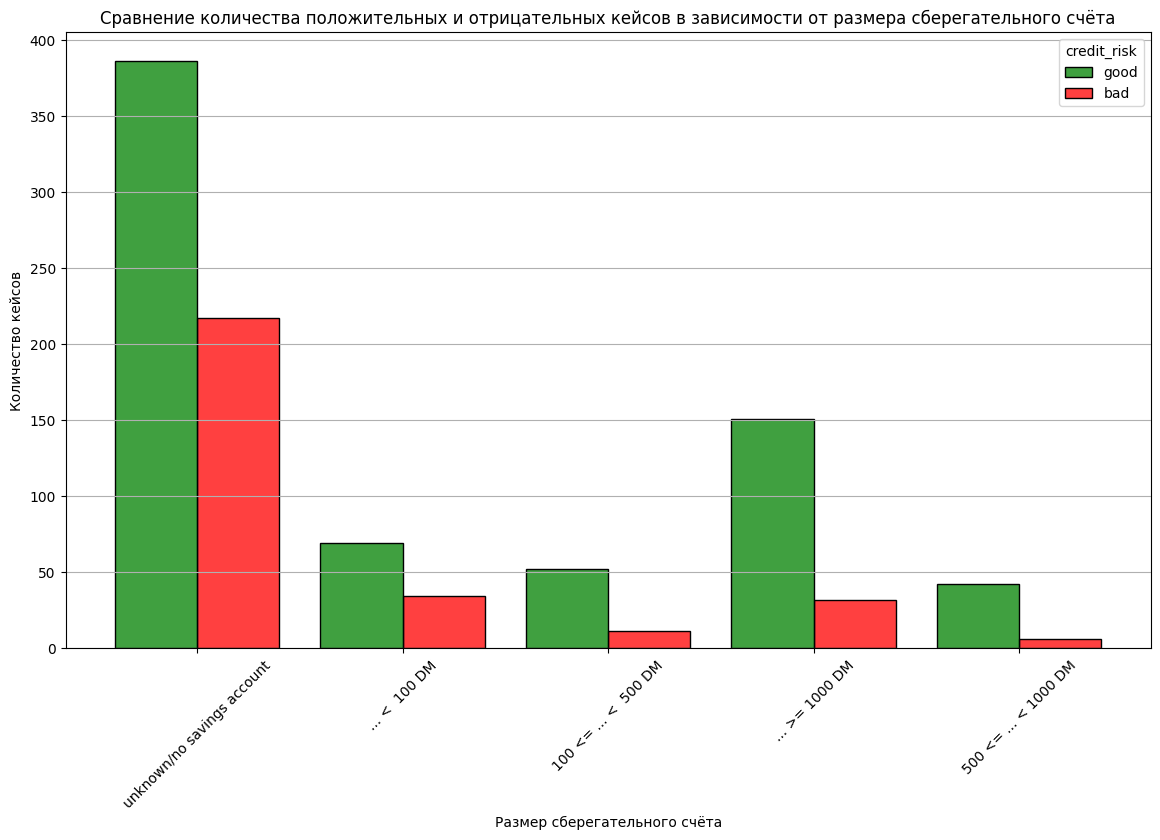

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем размер графика
plt.figure(figsize=(14, 8))

# Строим гистограмму с разделением на положительные и отрицательные кейсы
# - data=df: используем исходный DataFrame для построения
# - x='savings': столбец с размерами сберегательных счетов
# - hue='credit_risk': группировка данных по типу риска (положительный или отрицательный)
# - multiple='dodge': раздвигает столбцы для разных категорий (positive/negative) в разные стороны
# - shrink=0.8: немного уменьшает ширину столбцов для лучшей видимости
# - palette={'good': 'green', 'bad': 'red'}: задаем цветовую палитру для положительных (зелёный) и отрицательных (красный) рисков
sns.histplot(data=df, x='savings', hue='credit_risk', multiple='dodge', shrink=0.8, palette={'good': 'green', 'bad': 'red'})

# Добавляем заголовок графика
plt.title('Сравнение количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')

# Подписываем оси
plt.xlabel('Размер сберегательного счёта')
plt.ylabel('Количество кейсов')

# Поворот подписей на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Включаем сетку только по оси Y
plt.grid(True, axis='y')

# Отображаем график
plt.show()


### Задание 9

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

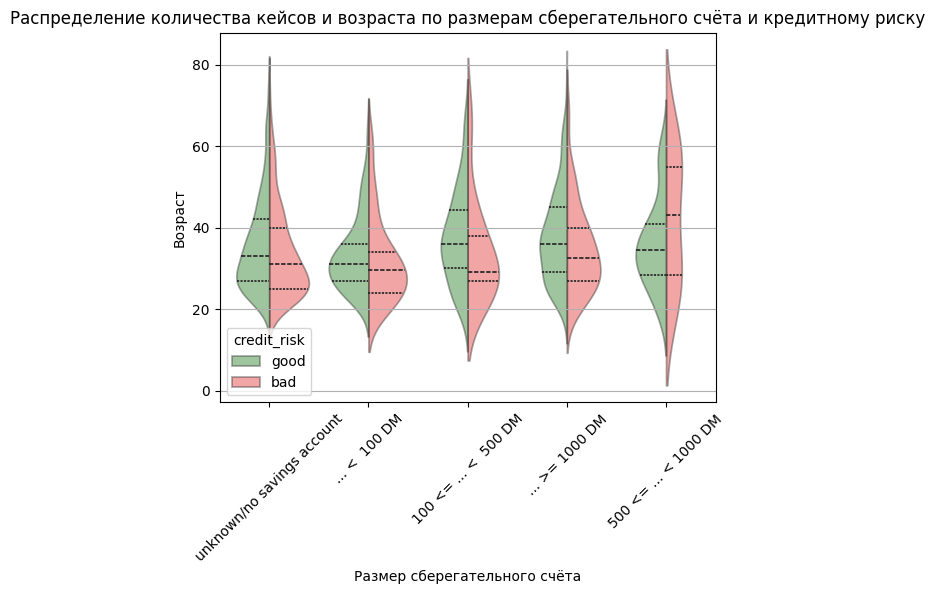

In [ ]:
# Строим скрипичную диаграмму для анализа распределения данных
sns.violinplot(
    data=df,                     # Используем DataFrame df
    x='savings',                  # Размер сберегательного счёта по оси X
    y='age',                      # Возраст по оси Y
    hue='credit_risk',            # Разделение данных по кредитному риску (хороший/плохой)
    split=True,                   # Разделяем график на две части для разных классов (credit_risk)
    palette={'good': 'green', 'bad': 'red'},  # Цвета для классов (хороший - зелёный, плохой - красный)
    alpha=0.4,                    # Прозрачность для улучшения видимости
    inner="quartile"              # Показываем квартили внутри графика
)

# Заголовок для графика
plt.title('Распределение количества кейсов и возраста по размерам сберегательного счёта и кредитному риску')

# Подписи осей
plt.xlabel('Размер сберегательного счёта')
plt.ylabel('Возраст')

# Поворот подписей на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Включение сетки по оси Y для улучшения восприятия графика
plt.grid(True, axis='y')

# Отображаем график
plt.show()


### Задание 10  

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

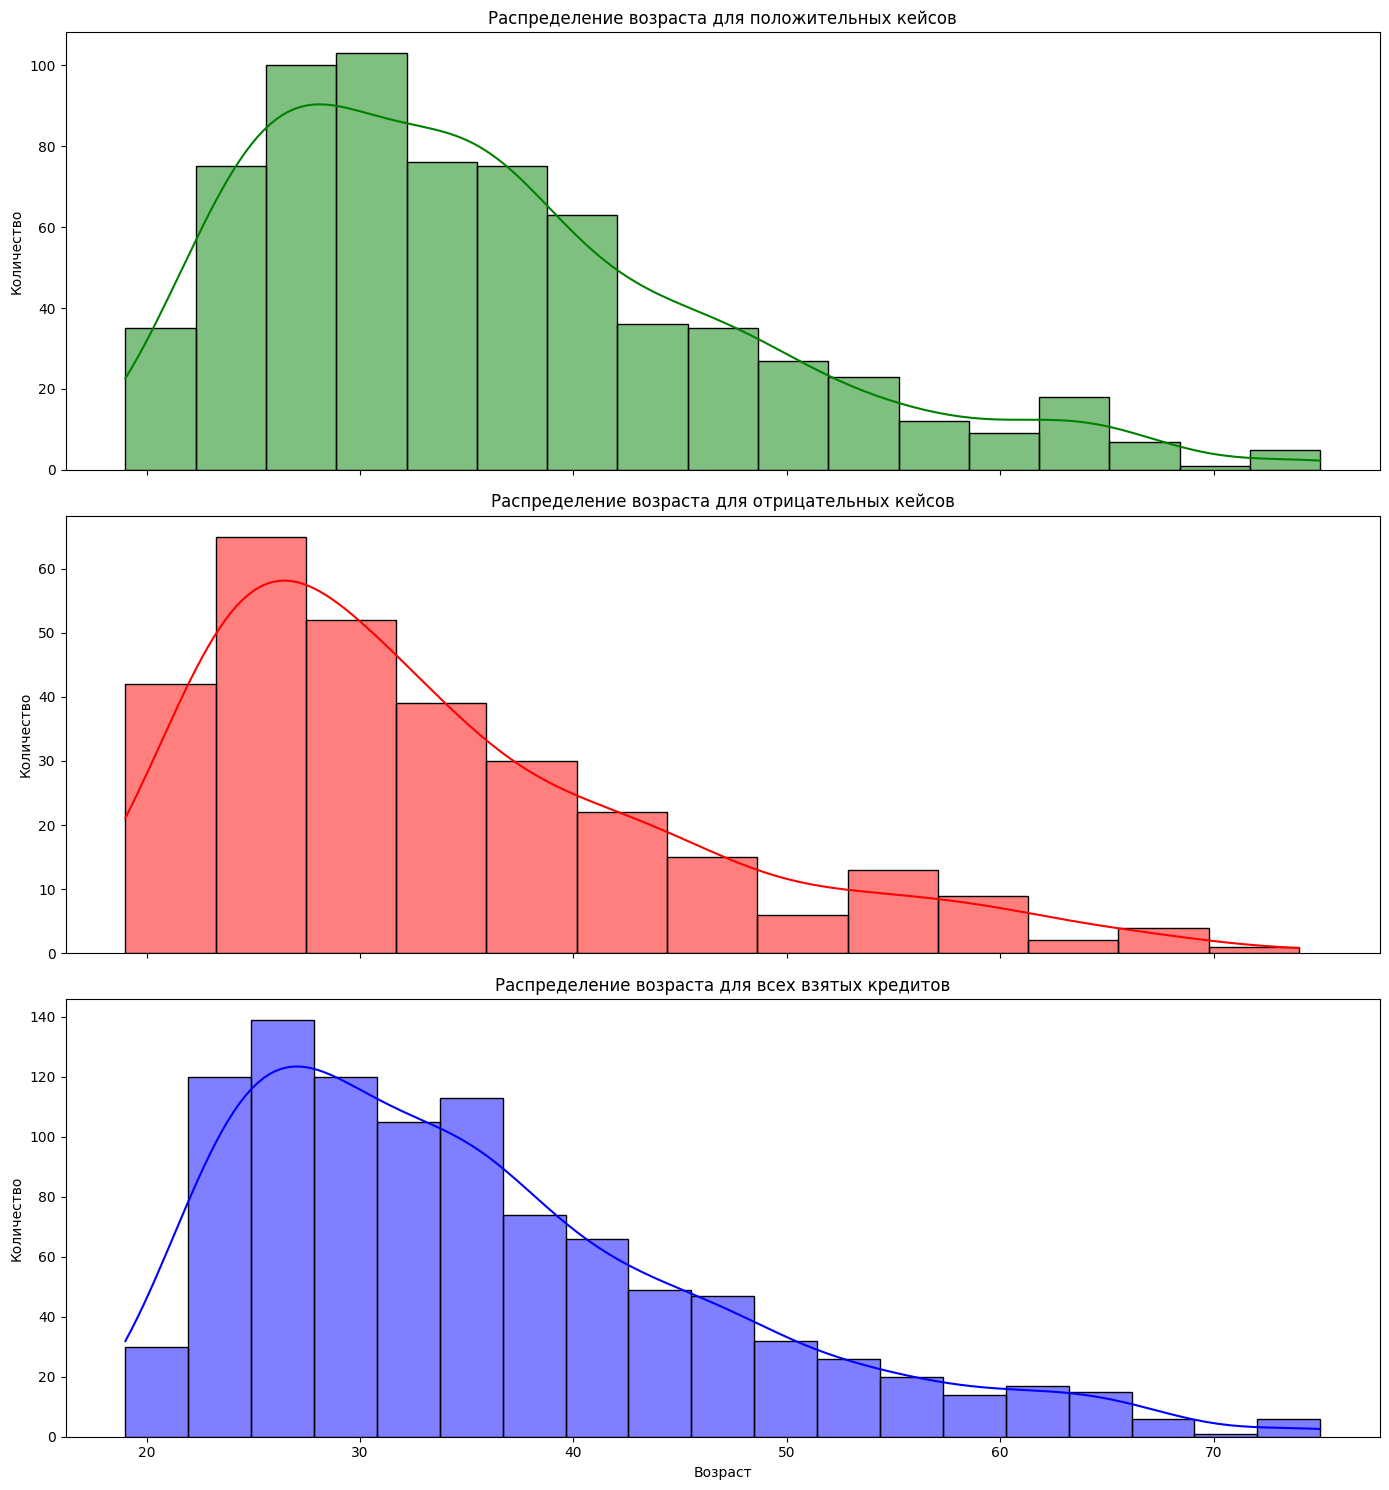

In [ ]:
# Создание фигуры и сетки из 3 подграфиков
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Гистограмма для положительных кейсов (кредитный риск - "good")
sns.histplot(data=df[df['credit_risk'] == 'good'], x='age', ax=axes[0], color='green', kde=True)
axes[0].set_title('Распределение возраста для положительных кейсов')  # Заголовок для первого графика
axes[0].set_ylabel('Количество')  # Подпись для оси Y

# Гистограмма для отрицательных кейсов (кредитный риск - "bad")
sns.histplot(data=df[df['credit_risk'] == 'bad'], x='age', ax=axes[1], color='red', kde=True)
axes[1].set_title('Распределение возраста для отрицательных кейсов')  # Заголовок для второго графика
axes[1].set_ylabel('Количество')  # Подпись для оси Y

# Гистограмма для всех кредитов (независимо от риска)
sns.histplot(data=df, x='age', ax=axes[2], color='blue', kde=True)
axes[2].set_title('Распределение возраста для всех взятых кредитов')  # Заголовок для третьего графика
axes[2].set_xlabel('Возраст')  # Подпись для оси X
axes[2].set_ylabel('Количество')  # Подпись для оси Y

# Оптимизация размещения графиков
plt.tight_layout()

# Отображение всех графиков
plt.show()


### Задание 11

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

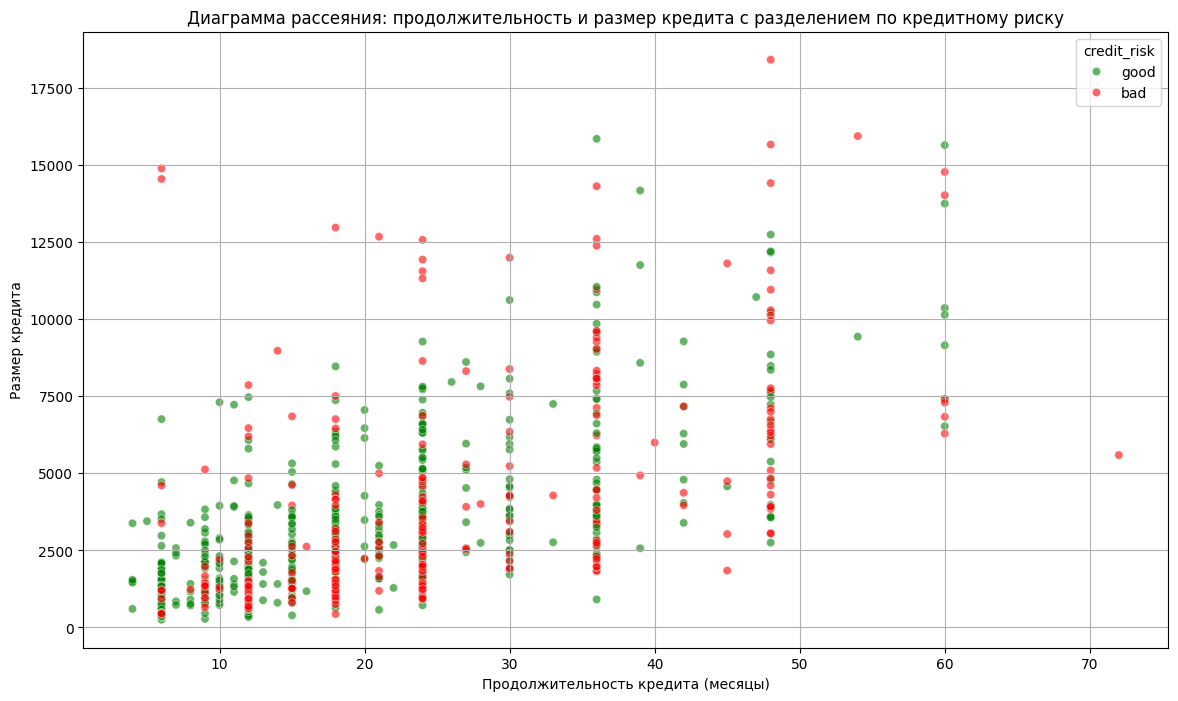

In [ ]:
# Создание графика
plt.figure(figsize=(14, 8))

# Диаграмма рассеяния для продолжительности и размера кредита
sns.scatterplot(
    data=df,  # Используем данные DataFrame
    x='duration',  # Ось X: продолжительность кредита (в месяцах)
    y='amount',  # Ось Y: размер кредита
    hue='credit_risk',  # Расцветка точек по значению 'credit_risk'
    palette={'good': 'green', 'bad': 'red'},  # Зеленый для хорошего, красный для плохого кредитного риска
    alpha=0.6  # Прозрачность точек
)

# Настройка заголовков и подписей
plt.title('Диаграмма рассеяния: продолжительность и размер кредита с разделением по кредитному риску')
plt.xlabel('Продолжительность кредита (месяцы)')
plt.ylabel('Размер кредита')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()


### Задание 12 

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

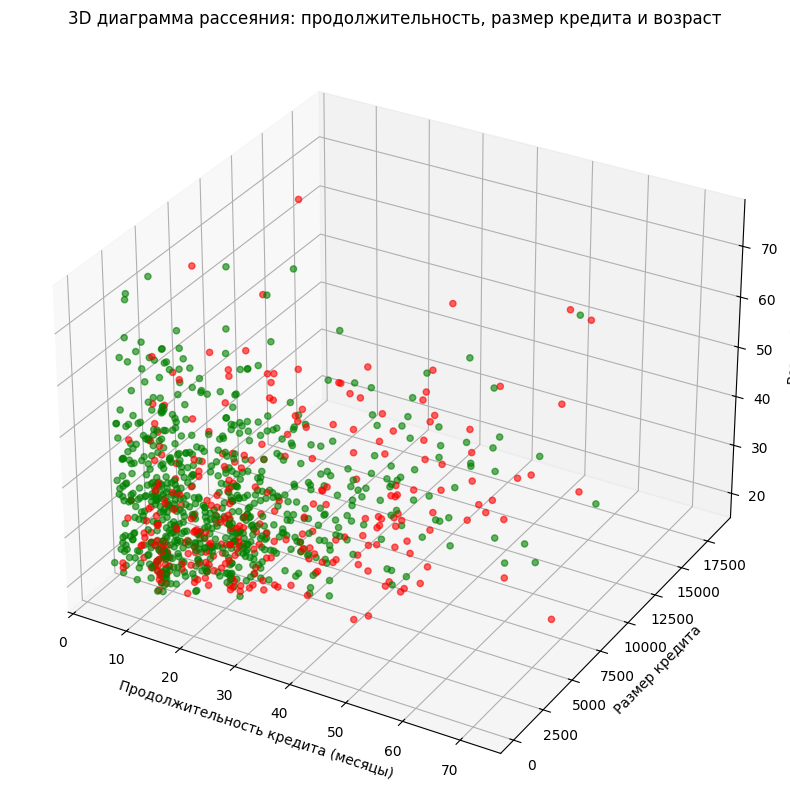

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Создание фигуры для 3D графика
fig = plt.figure(figsize=(14, 10))

# Добавление 3D осей
ax = fig.add_subplot(111, projection='3d')

# Задание цветов для каждого типа кредитного риска
colors = {'good': 'green', 'bad': 'red'}

# Построение 3D диаграммы рассеяния
scatter = ax.scatter(
    df['duration'],  # Ось X: продолжительность кредита (месяцы)
    df['amount'],    # Ось Y: размер кредита
    df['age'],       # Ось Z: возраст клиента
    c=df['credit_risk'].map(colors),  # Расцветка точек по кредитному риску
    alpha=0.6       # Прозрачность точек
)

# Заголовок и подписи осей
ax.set_title('3D диаграмма рассеяния: продолжительность, размер кредита и возраст')
ax.set_xlabel('Продолжительность кредита (месяцы)')
ax.set_ylabel('Размер кредита')
ax.set_zlabel('Возраст')

# Отображение графика
plt.show()


### Задание 13 

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
# Импортируем LabelEncoder для преобразования категориальных признаков в числовые
from sklearn.preprocessing import LabelEncoder

# Список бинарных признаков (те, которые принимают два возможных значения, например, "yes" или "no")
binary_features = ['foreign_worker', 'telephone']

# Список порядковых признаков (те, которые могут быть закодированы с учетом их порядка, например, "low", "medium", "high")
ordinal_features = ['employment_duration', 'installment_rate', 'number_credits', 'people_liable']

# Преобразуем бинарные признаки в числовой формат
for feature in binary_features:
    # Используем LabelEncoder для бинарных признаков
    # fit_transform() сначала находит все уникальные значения, затем заменяет их на числа (например, 'yes' -> 1, 'no' -> 0)
    df[feature] = LabelEncoder().fit_transform(df[feature])

# Преобразуем порядковые признаки в числовой формат
for feature in ordinal_features:
    # Порядковые признаки также кодируются числами
    # Например, 'low' -> 0, 'medium' -> 1, 'high' -> 2
    df[feature] = LabelEncoder().fit_transform(df[feature])

# Список категориальных признаков, которые мы собираемся удалить из данных
categorical_features = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex',
                        'other_debtors', 'present_residence', 'property', 'other_installment_plans',
                        'housing', 'job']

# Удаляем категориальные признаки из DataFrame
# drop(columns=categorical_features удаляет указанные столбцы из DataFrame
df = df.drop(columns=categorical_features)

# Выводим первые несколько строк DataFrame для проверки изменений
print(df.head())


   duration  amount  employment_duration  installment_rate  age  \
0        18    1049                    2                 2   21   
1         9    2799                    0                 1   36   
2        12     841                    1                 1   23   
3        12    2122                    0                 0   39   
4        12    2171                    0                 2   38   

   number_credits  people_liable  telephone  foreign_worker credit_risk  
0               0              0          0               0        good  
1               1              1          0               0        good  
2               0              0          0               0        good  
3               1              1          0               1        good  
4               1              0          0               1        good  


### Задание 14 

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
# Импортируем необходимые модули
from sklearn.model_selection import train_test_split  # для разделения данных на обучающую и тестовую выборки
from sklearn.metrics import accuracy_score  # для вычисления точности модели
import numpy as np  # для работы с массивами и матрицами

# Преобразуем целевую переменную 'credit_risk' в числовые значения: 1 для 'good' и 0 для 'bad'
df['credit_risk'] = df['credit_risk'].apply(lambda x: 1 if x == 'good' else 0)

# Определяем X (признаки) и y (целевая переменная)
X = df.drop('credit_risk', axis=1).values  # удаляем столбец с целевой переменной, оставляем только признаки
y = df['credit_risk'].values  # сохраняем столбец с целевой переменной

# Разделяем данные на обучающую и тестовую выборки (75% обучающие, 25% тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Определяем функцию предсказания
def predict(Xtest: np.array) -> np.array:
    # Определяем веса признаков для линейной модели
    weights = np.array([0.1, 0.05, 0.2, 0.15, 0.05, 0.1, 0.1, 0.05, 0.05])
    threshold = 1.5  # Порог для принятия решения (если взвешенная сумма признаков больше порога, то класс 1, иначе класс 0)

    # Рассчитываем взвешенную сумму признаков для каждого примера в тестовой выборке
    predictions = np.dot(Xtest, weights) > threshold  # np.dot(Xtest, weights) - скалярное произведение
    return predictions.astype(int)  # Возвращаем 0 или 1 как предсказание

# Рассчитываем точность модели на тестовой выборке
accuracy = accuracy_score(y_test, predict(X_test))  # Сравниваем предсказания с истинными значениями
print(f"Точность на тестовой выборке: {accuracy:.2f}")  # Выводим точность с округлением до 2 знаков


Точность на тестовой выборке: 0.66
